# Paper Link :- https://arxiv.org/abs/2010.11929

In [1]:
import matplotlib.pyplot as plt 
from data_setup import create_dataloader
from pathlib import Path
from utils import get_class_names


import torch
import torch.nn as nn
from torchvision import transforms

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
data_directory = Path("../../Projects/dog_breed_classification/data")
images_directory = data_directory/"Images"
images_directory

PosixPath('../../Projects/dog_breed_classification/data/Images')

In [4]:
class_names,class_to_idx,idx_to_class = get_class_names(images_directory=images_directory)

In [5]:
data_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [6]:
train_dataloader,test_dataloader = create_dataloader(images_directory=images_directory,
                                                     batch_size=32,
                                                     data_transforms=data_transforms,
                                                     num_workers=16
                                                     )

In [7]:
len(train_dataloader),len(test_dataloader)

(514, 128)

In [8]:
img,label = next(iter(train_dataloader))
img[0].shape

torch.Size([3, 224, 224])

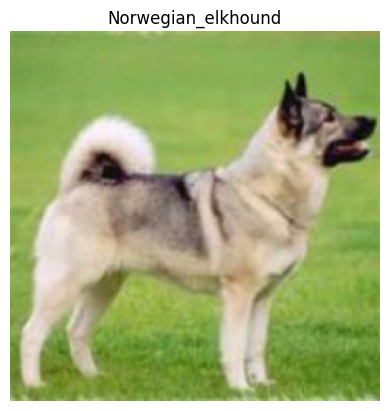

In [9]:
plt.imshow(img[1].permute(1,2,0))
plt.title(idx_to_class[label[1].item()])
plt.axis("off");

In [10]:
import random
random.seed(42)

In [11]:
height = 224
width = 224 
color_channels = 3
patch_size = 16


number_of_patches = int((height*width)/(patch_size*patch_size))
print(f"No. of patches:- {number_of_patches}")

No. of patches:- 196


In [12]:
embedding_layer_input_shape = (height,width,color_channels)
embedding_layer_output_shape = (number_of_patches, (patch_size**2)*color_channels)
print(f"Input Shape: {embedding_layer_input_shape}\nOutput Shape: {embedding_layer_output_shape}")

Input Shape: (224, 224, 3)
Output Shape: (196, 768)


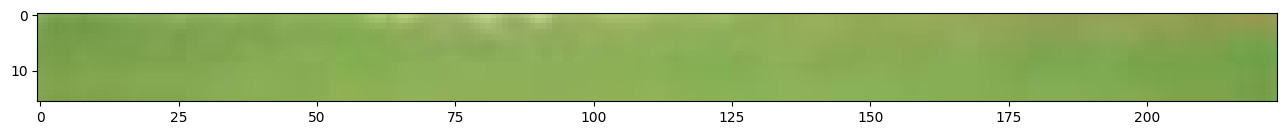

In [13]:
image_permuted = img[1].permute(1,2,0)
plt.figure(figsize=(patch_size,patch_size))
plt.imshow(image_permuted[:patch_size,:,:])


In [14]:
img_size = 224
num_patches_per_row = img_size/patch_size
assert img_size%patch_size == 0

print(num_patches_per_row)

14.0


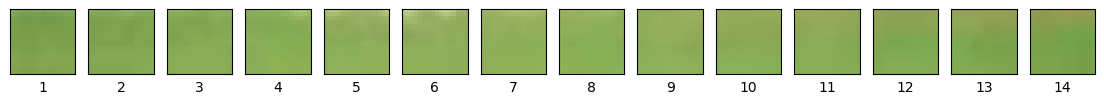

In [15]:
fig,axis = plt.subplots(nrows=1,
                        ncols=img_size//patch_size,
                        figsize=(num_patches_per_row,num_patches_per_row),
                        sharex=True,
                        sharey=True)

for i,patch in enumerate(range(0,img_size,patch_size)):
    
    axis[i].imshow(image_permuted[
        :patch_size,patch:patch+patch_size, :]);
    axis[i].set_xlabel(i+1)
    axis[i].set_xticks([])
    axis[i].set_yticks([])

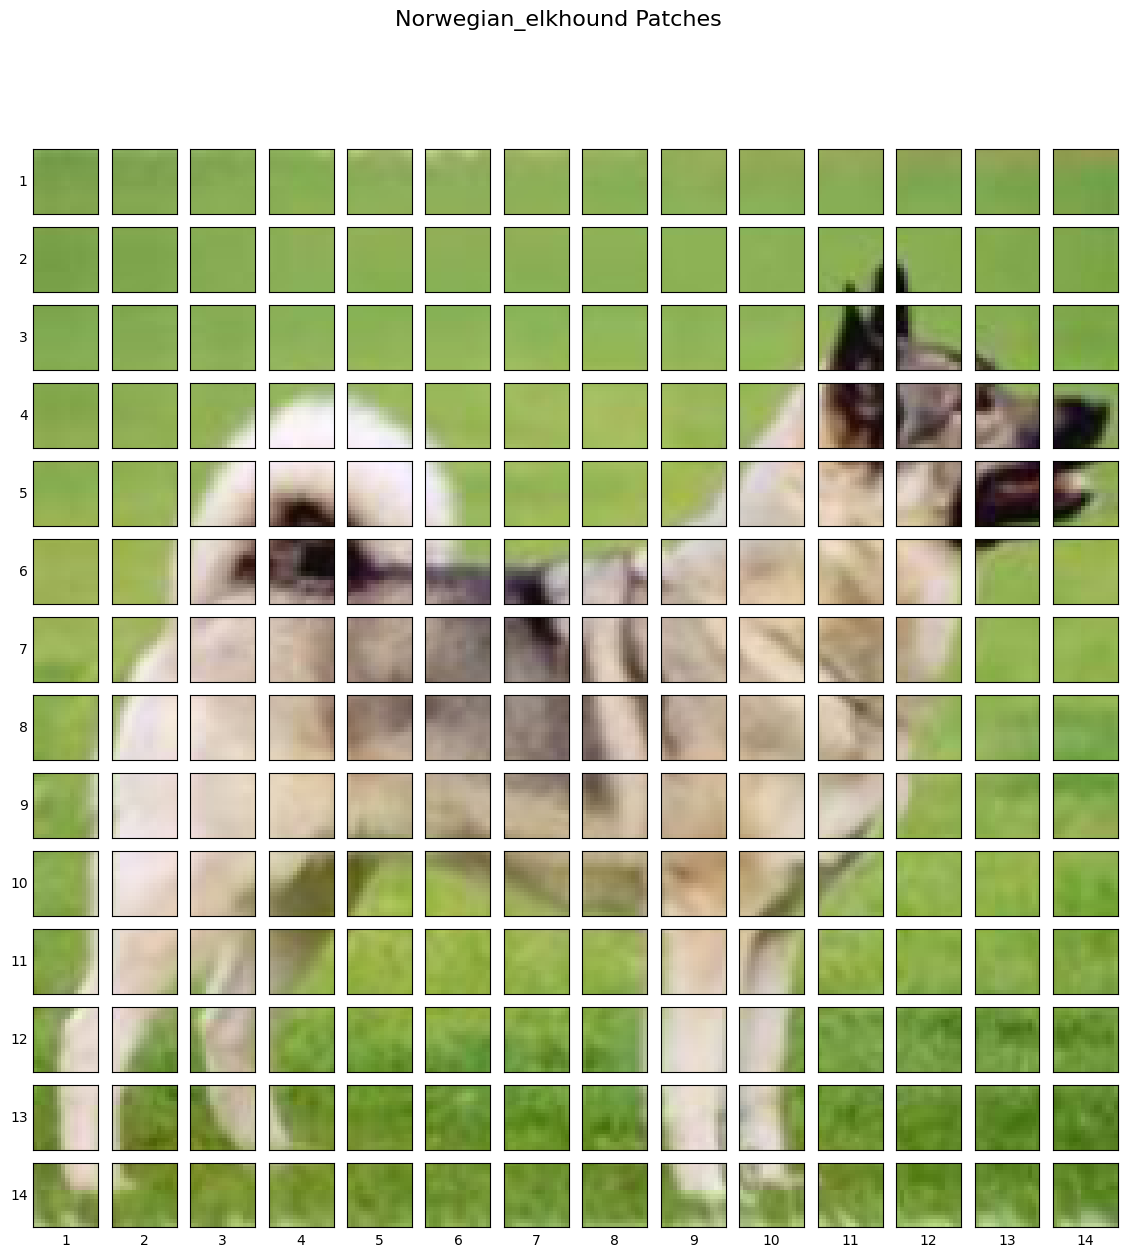

In [16]:
fig,axis = plt.subplots(nrows=img_size//patch_size,
                        ncols = img_size//patch_size,
                        figsize = (num_patches_per_row,num_patches_per_row),
                        sharex=True,
                        sharey=True)

for i,patch_height in enumerate(range(0,img_size,patch_size)):
    for j,patch_width in enumerate(range(0,img_size,patch_size)):
        
        axis[i,j].imshow(image_permuted[patch_height:patch_height+patch_size,patch_width:patch_width+patch_size,:])
        axis[i,j].set_ylabel(i+1,
                             rotation="horizontal",
                             horizontalalignment="right",
                             verticalalignment="center")
        
        axis[i,j].set_xlabel(j+1)
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        axis[i,j].label_outer()
        
        
fig.suptitle(f"{idx_to_class[label[1].item()]} Patches",fontsize=16)
plt.show()



In [17]:
conv2d = nn.Conv2d(in_channels=3,
                   out_channels=768,
                   kernel_size=patch_size,
                   stride=patch_size,
                   padding=0)

In [18]:
image = img[1]

image_out_of_conv = conv2d(image.unsqueeze(dim=0))
image_out_of_conv.shape

torch.Size([1, 768, 14, 14])

tensor([[[-0.1714, -0.1962, -0.1814, -0.1965, -0.2176, -0.2321, -0.2184,
          -0.1951, -0.1951, -0.1886, -0.1934, -0.1728, -0.1722, -0.1728],
         [-0.1769, -0.1776, -0.1846, -0.1877, -0.1899, -0.1923, -0.1902,
          -0.1867, -0.1853, -0.1790, -0.1385, -0.1913, -0.1653, -0.1550],
         [-0.1680, -0.1715, -0.1723, -0.1783, -0.1725, -0.1734, -0.1577,
          -0.1772, -0.1720, -0.1851,  0.0441, -0.1300, -0.1892, -0.1401],
         [-0.1675, -0.1772, -0.2395, -0.2113, -0.0305, -0.1375, -0.1923,
          -0.1915, -0.1925, -0.1861,  0.1434, -0.2261, -0.1459, -0.2632],
         [-0.1751, -0.1961, -0.3249, -0.3475, -0.3909,  0.0062, -0.1980,
          -0.2003, -0.2027, -0.2893, -0.1228, -0.0493, -0.1338, -0.2223],
         [-0.1882, -0.2365, -0.1808,  0.0288, -0.3395, -0.0780, -0.4476,
          -0.0401, -0.2856, -0.2040, -0.2743, -0.1611, -0.1470, -0.1859],
         [-0.2393, -0.1831, -0.2404, -0.1112, -0.2222, -0.1187,  0.0461,
          -0.0369, -0.1965, -0.2335, -0.1655,

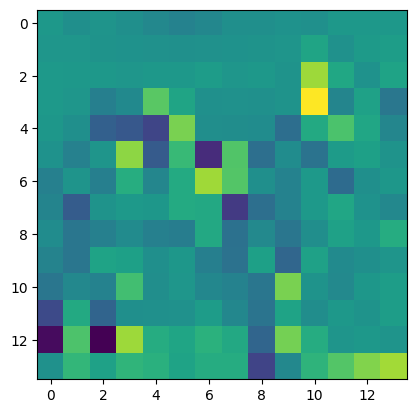

In [19]:
single_feature_map = image_out_of_conv[:,0,:,:]
print(single_feature_map)
plt.imshow(single_feature_map.permute(1,2,0).detach().numpy())

In [20]:
flatten = nn.Flatten(start_dim=2,end_dim=3)
image_out_of_conv_flatten = flatten(image_out_of_conv)
print(image_out_of_conv_flatten.shape)
correct_image_out_of_conv_flatten = image_out_of_conv_flatten.permute(0,2,1)
print(correct_image_out_of_conv_flatten.shape)

torch.Size([1, 768, 196])
torch.Size([1, 196, 768])


In [21]:
image_out_of_conv.shape

torch.Size([1, 768, 14, 14])

(np.float64(-0.5), np.float64(195.5), np.float64(0.5), np.float64(-0.5))

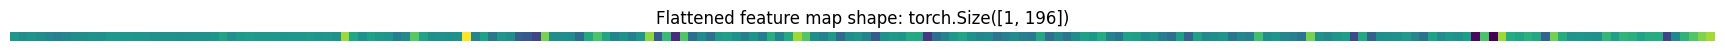

In [22]:
single_flattened_feature_map = correct_image_out_of_conv_flatten[:,:,0]
plt.figure(figsize=(22,22))
plt.title(f"Flattened feature map shape: {single_flattened_feature_map.shape}")
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.axis("off")

In [23]:
single_flattened_feature_map

tensor([[-0.1714, -0.1962, -0.1814, -0.1965, -0.2176, -0.2321, -0.2184, -0.1951,
         -0.1951, -0.1886, -0.1934, -0.1728, -0.1722, -0.1728, -0.1769, -0.1776,
         -0.1846, -0.1877, -0.1899, -0.1923, -0.1902, -0.1867, -0.1853, -0.1790,
         -0.1385, -0.1913, -0.1653, -0.1550, -0.1680, -0.1715, -0.1723, -0.1783,
         -0.1725, -0.1734, -0.1577, -0.1772, -0.1720, -0.1851,  0.0441, -0.1300,
         -0.1892, -0.1401, -0.1675, -0.1772, -0.2395, -0.2113, -0.0305, -0.1375,
         -0.1923, -0.1915, -0.1925, -0.1861,  0.1434, -0.2261, -0.1459, -0.2632,
         -0.1751, -0.1961, -0.3249, -0.3475, -0.3909,  0.0062, -0.1980, -0.2003,
         -0.2027, -0.2893, -0.1228, -0.0493, -0.1338, -0.2223, -0.1882, -0.2365,
         -0.1808,  0.0288, -0.3395, -0.0780, -0.4476, -0.0401, -0.2856, -0.2040,
         -0.2743, -0.1611, -0.1470, -0.1859, -0.2393, -0.1831, -0.2404, -0.1112,
         -0.2222, -0.1187,  0.0461, -0.0369, -0.1965, -0.2335, -0.1655, -0.2965,
         -0.1947, -0.1750, -

In [24]:
correct_image_out_of_conv_flatten.shape[2]

768

In [25]:
correct_image_out_of_conv_flatten.shape[0]

1

In [26]:
batch_size = correct_image_out_of_conv_flatten.shape[0]
embedding_dim = correct_image_out_of_conv_flatten.shape[-1]

class_token = nn.Parameter(torch.ones(batch_size,1,embedding_dim),requires_grad=True)

print(class_token[:,:,:10])
print(class_token.shape)

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
torch.Size([1, 1, 768])


In [27]:
patch_embedding_image_with_class_embedding = torch.cat((class_token,correct_image_out_of_conv_flatten),dim=1)

In [28]:
patch_embedding_image_with_class_embedding.shape

torch.Size([1, 197, 768])

In [29]:
patch_embedding_image_with_class_embedding

tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.1714, -0.2900, -0.1414,  ...,  0.1487, -0.1236, -0.3744],
         [-0.1962, -0.3051, -0.1307,  ...,  0.1571, -0.1095, -0.3977],
         ...,
         [-0.0361, -0.1993, -0.1293,  ...,  0.2119, -0.2384, -0.3313],
         [ 0.0157, -0.2342, -0.1006,  ...,  0.2103, -0.1784, -0.3627],
         [ 0.0485, -0.1875, -0.1169,  ...,  0.1738, -0.2057, -0.3696]]],
       grad_fn=<CatBackward0>)

In [30]:
positional_embedding = nn.Parameter(torch.ones(1,number_of_patches+1,embedding_dim),
                                    requires_grad=True)

positional_embedding[:,:10,:10]

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)

In [31]:
positional_embedding.shape

torch.Size([1, 197, 768])

In [32]:
path_and_postion_embedding = patch_embedding_image_with_class_embedding + positional_embedding

In [33]:
path_and_postion_embedding.shape

torch.Size([1, 197, 768])

In [34]:
path_and_postion_embedding

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.8286, 0.7100, 0.8586,  ..., 1.1487, 0.8764, 0.6256],
         [0.8038, 0.6949, 0.8693,  ..., 1.1571, 0.8905, 0.6023],
         ...,
         [0.9639, 0.8007, 0.8707,  ..., 1.2119, 0.7616, 0.6687],
         [1.0157, 0.7658, 0.8994,  ..., 1.2103, 0.8216, 0.6373],
         [1.0485, 0.8125, 0.8831,  ..., 1.1738, 0.7943, 0.6304]]],
       grad_fn=<AddBackward0>)

In [35]:
from image_embedding import ImageEmbedding

convert_image_embedding = ImageEmbedding(number_of_patches=number_of_patches,
                                         batch_size=batch_size)

In [36]:
path_and_postion_embedding_final = convert_image_embedding(image.unsqueeze(dim=0))

In [37]:
#path_and_postion_embedding_final.shape

In [38]:
from MHA_block import MultiHeadAttention

multihead_attention_block = MultiHeadAttention(12,768,0)

patched_image_through_mha = multihead_attention_block(path_and_postion_embedding)
patched_image_through_mha

tensor([[[ 0.4999, -0.6145,  0.5957,  ..., -0.2897, -0.7547, -0.2310],
         [ 0.4956, -0.6161,  0.5936,  ..., -0.2856, -0.7531, -0.2332],
         [ 0.4955, -0.6161,  0.5936,  ..., -0.2856, -0.7529, -0.2334],
         ...,
         [ 0.4961, -0.6174,  0.5930,  ..., -0.2868, -0.7533, -0.2321],
         [ 0.4951, -0.6183,  0.5938,  ..., -0.2864, -0.7530, -0.2321],
         [ 0.4957, -0.6179,  0.5934,  ..., -0.2868, -0.7527, -0.2321]]],
       grad_fn=<TransposeBackward0>)

In [39]:
patched_image_through_mha.shape

torch.Size([1, 197, 768])

In [40]:
from MLP_block import MLPBlock

mlp_block = MLPBlock(768,3072)

patched_image_through_mlp = mlp_block(patched_image_through_mha)
patched_image_through_mlp

tensor([[[ 4.8869e-01, -1.2655e-01,  3.0510e-05,  ..., -1.0125e-01,
           5.3661e-02,  2.6206e-01],
         [ 3.8218e-01,  1.9734e-01, -1.1622e-01,  ..., -7.4518e-02,
          -1.3717e-02,  2.9155e-01],
         [ 4.2097e-01,  3.9334e-02, -0.0000e+00,  ..., -0.0000e+00,
          -1.0223e-01,  2.1131e-01],
         ...,
         [ 4.9005e-01,  5.2660e-02, -7.7725e-02,  ..., -1.0971e-01,
           6.1709e-02,  2.5562e-01],
         [ 3.8018e-01, -2.8859e-02, -0.0000e+00,  ..., -2.0137e-01,
          -9.5867e-02,  2.1918e-01],
         [ 3.3332e-01, -1.2621e-01, -9.9040e-02,  ..., -1.0177e-01,
          -8.1718e-02,  2.2485e-01]]], grad_fn=<MulBackward0>)

In [41]:
patched_image_through_mlp.shape

torch.Size([1, 197, 768])

In [42]:
from vision_transformer import VisionTransformer
from torchinfo import summary

transformer_encoder_block = VisionTransformer(embedding_dim=768,
                                                num_heads=12,
                                                mlp_size=3072,
                                                mlp_dropout=0.1,
                                                attention_dropout=0)

summary(model=transformer_encoder_block,
        input_size = (1,197,768),
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                   [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiHeadAttention (mha)                              [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                           [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attention)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                                  [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                           [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Linear (layer1)                                  [1, 197, 768]        [1, 197, 3072]       2,362,368            True
│  

In [43]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
import random
from PIL import Image


import torch
from torchvision import transforms,models
from torch.utils.data import Dataset,DataLoader,random_split
from torchinfo import summary


def walk_through_directory(directory):
    
    for dirpaths,dirnames,filenames in os.walk(directory):
        print(f"There are {len(dirnames)} directories, {len(filenames)} filenames in {dirpaths}")




def show_images(images_directory: str, n: int,transform=None):
    

    image_paths = list(images_directory.glob("*/*.jpg"))
    random_images = random.sample(image_paths, k=n)

    for path_img in random_images:
        img = Image.open(path_img)
        fig,ax = plt.subplots(1,2,figsize=(5,5))
        ax[0].imshow(img)
      
        ax[0].set_title("Original")
        ax[0].axis("off")

        if transform:
            transformed_image = transform(img).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title("Transformed")
            ax[1].axis("off")
    


def get_class_names(images_directory:str):
    
    class_names = sorted([classes.name for classes in os.scandir(images_directory)])
    filtered_names = [i.split("-")[1] for i in class_names]

    class_to_idx = {classes:index for index,classes in enumerate(filtered_names)}
    idx_to_class = {index:classes for index,classes in enumerate(filtered_names)}

    return filtered_names,class_to_idx,idx_to_class


def model_summary(model):
    
    summary(model=model,
        input_size=(32,3,224,224),
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"]
    )
    
    
def accuracy_fn(y_true,y_pred):
    
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))
    return acc

In [44]:
import torch
import torch.nn as nn


def train_step(model: torch.nn.Module,
               train_dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device : torch.device,
               ):
    
    
    epoch_train_loss = 0.0
    epoch_train_acc = 0.0
    
    for X,y in train_dataloader:

        model.train()
        X = X.to(device)
        y = y.to(device)

        y_pred = model(X)
        tr_loss = loss_fn(y_pred.squeeze(),y)
        tr_acc = accuracy_fn(y,y_pred.argmax(dim=1))
        
        epoch_train_loss+=tr_loss
        epoch_train_acc+=tr_acc

        optimizer.zero_grad()
        tr_loss.backward()
        optimizer.step()


    epoch_train_loss/=len(train_dataloader)
    epoch_train_acc/=len(train_dataloader) 
    
    return epoch_train_loss,epoch_train_acc   
    
    
def test_step(model: torch.nn.Module,
               test_dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device : torch.device,
):
    
    
    epoch_test_loss= 0.0
    epoch_test_acc = 0.0
    
    with torch.inference_mode():
        model.eval()
        for X,y in test_dataloader:
            
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)
            te_loss = loss_fn(y_pred,y)
            te_acc = accuracy_fn(y,y_pred.argmax(dim=1))

            epoch_test_loss += te_loss
            epoch_test_acc += te_acc



    epoch_test_loss = epoch_test_loss/len(test_dataloader)
    epoch_test_acc = epoch_test_acc/len(test_dataloader)

    return epoch_test_loss,epoch_test_acc


def train(epochs: int,
          model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          device : torch.device):
    
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    
    for epoch in range(epochs):
        
        epoch_train_loss,epoch_train_acc = train_step(model,
                                                      train_dataloader,
                                                      loss_fn,
                                                      optimizer,
                                                      device,
                                                      )
        epoch_test_loss,epoch_test_acc = test_step(model,
                                                   test_dataloader,
                                                   loss_fn,
                                                   device
                                                   )
        train_loss.append(epoch_train_loss)
        train_acc.append(epoch_train_acc)
        test_loss.append(epoch_test_loss)
        test_acc.append(epoch_test_acc)
        
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {epoch_train_loss:.4f} | "
          f"train_acc: {epoch_train_acc:.4f} | "
          f"test_loss: {epoch_test_loss:.4f} | "
          f"test_acc: {epoch_test_acc:.4f}"
        )
        
    return train_loss, train_acc, test_loss, test_acc

In [46]:
from final_model import FinalModel

model = FinalModel(batch_size=32).to(device)
# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()


# Train the model and save the training results to a dictionary
train_loss,train_acc,test_loss,test_acc = train(epochs=20,
                                                model=model,
                                                train_dataloader=train_dataloader,
                                                test_dataloader=test_dataloader,
                                                loss_fn=loss_fn,
                                                optimizer=optimizer,
                                                device=device)

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 3.80 GiB of which 15.69 MiB is free. Including non-PyTorch memory, this process has 3.76 GiB memory in use. Of the allocated memory 3.59 GiB is allocated by PyTorch, and 65.48 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)